In [8]:
import pandas as pd
import seaborn as sns

nf_df=pd.read_csv(r'Netflix Dataset.csv')
nf_df.head(12)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [41]:
nf_df[nf_df.duplicated()] # duplicated values

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,release_year


In [42]:
nf_df.drop_duplicates(inplace=True) #removing duplicates value making it permanent

In [43]:
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7787 non-null   object
 1   Category      7787 non-null   object
 2   Title         7787 non-null   object
 3   Director      5399 non-null   object
 4   Cast          7069 non-null   object
 5   Country       7280 non-null   object
 6   Release_Date  7777 non-null   object
 7   Rating        7780 non-null   object
 8   Duration      7787 non-null   object
 9   Type          7787 non-null   object
 10  Description   7787 non-null   object
 11  release_year  7787 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 1.0+ MB


In [44]:
#1st requiement #'House of Cards', what is the Show Id and Who is the Director
nf_df.loc[nf_df['Title']=='House of Cards',['Show_Id','Director']]
#nf_df[nf_df['Title']=='House of Cards'][['Show_Id','Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9952\2573199279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_new['Year_Released'] = nf_new['Release_Date'].str[-4:]


<Axes: xlabel='Year_Released', ylabel='Show_Id'>

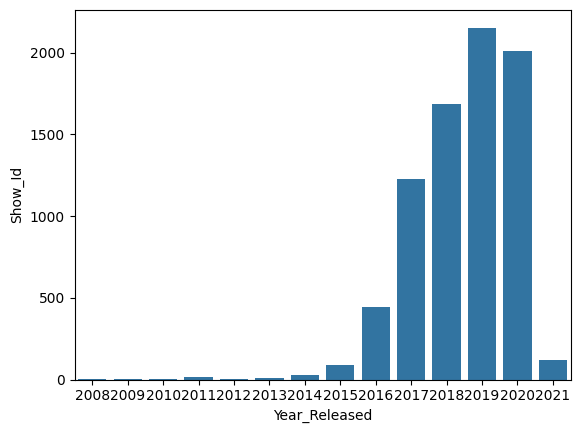

In [45]:
#2nd req #which year the highest number of the TV Shows & Movies were released
nf_new=nf_df[['Show_Id','Release_Date']]
nf_new['Year_Released'] = nf_new['Release_Date'].str[-4:]
nf_new=nf_new.dropna()
nf_new
xy= nf_new.groupby('Year_Released')['Show_Id'].count().reset_index()
xy
sns.barplot(data=xy, x='Year_Released',y='Show_Id')

<Axes: xlabel='Category', ylabel='Show_Id'>

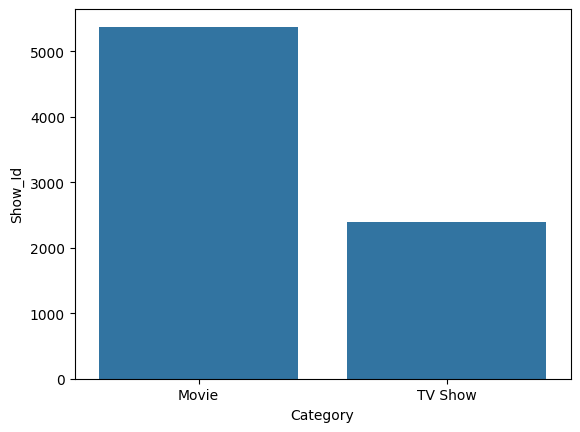

In [46]:
#3rd req Movies & TV Shows are in the dataset
nf_new['Category'] = nf_df['Category']
nf_new
xy=nf_new.groupby('Category')['Show_Id'].count().reset_index()
xy
sns.barplot(data=xy, x='Category',y='Show_Id')

In [47]:
#4th req # Movies that were released in year 2008
nf_df['release_year']=nf_df['Release_Date'].str[-4:]
movies_in_2k= nf_df.loc[nf_df['release_year']=='2008',['release_year','Title']]
movies_in_2k

,release_year,Title
1765,2008,Dinner for Five
7115,2008,To and From New York


In [48]:
#5th req #TV Shows that were released in India
tvshows_india=nf_df[(nf_df['Country']=='India') & (nf_df['Category']=='TV Show')][['Category','Country','Title']]
tvshows_india

,Category,Country,Title
86,TV Show,India,21 Sarfarosh: Saragarhi 1897
132,TV Show,India,7 (Seven)
340,TV Show,India,Agent Raghav
364,TV Show,India,Akbar Birbal
533,TV Show,India,Anjaan: Rural Myths
...,...,...,...
6249,TV Show,India,The Creative Indians
6400,TV Show,India,The Golden Years with Javed Akhtar
6469,TV Show,India,The House That Made Me
7294,TV Show,India,Typewriter


In [49]:
#6th req #Top 10 Directors
top10dir=nf_df.groupby('Director')['Show_Id'].count().reset_index()
top10dir=top10dir.sort_values(by='Show_Id',ascending=False).head(10)
top10dir

,Director,Show_Id
3078,"Raúl Campos, Jan Suter",18
2321,Marcus Raboy,16
1607,Jay Karas,14
624,Cathy Garcia-Molina,13
2388,Martin Scorsese,12
1604,Jay Chapman,12
4008,Youssef Chahine,12
3600,Steven Spielberg,10
875,David Dhawan,9
1794,Johnnie To,8


In [50]:
#7th req # Type is Comedies" or "Country is United Kingdom
comedy_movies=nf_df[(nf_df['Category']=='Movie') & (nf_df['Type']=='Comedies')][['Title','Type']]
comedy_movies

,Title,Type
33,#realityhigh,Comedies
72,17 Again,Comedies
84,21 & Over,Comedies
148,A Bad Moms Christmas,Comedies
174,A Futile and Stupid Gesture,Comedies
...,...,...
7341,Undercover Brother 2,Comedies
7590,Where's the Money,Comedies
7623,Wild Oats,Comedies
7634,Wine Country,Comedies


In [51]:
#8th req #movies/shows, Tom Cruise was cast
Tom_Cruise_Movies=nf_df[nf_df['Cast'].str.contains('Tom Cruise', na=False)][['Title','Cast']]
Tom_Cruise_Movies

,Title,Cast
3860,Magnolia,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A..."
5071,Rain Man,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge..."


In [52]:
#9th req #different Ratings
nf_df['Rating'].drop_duplicates()


0          TV-MA
2              R
3          PG-13
8          TV-14
19         TV-PG
25            NR
31          TV-G
55          TV-Y
67           NaN
108        TV-Y7
145           PG
155            G
996        NC-17
1662    TV-Y7-FV
2484          UR
Name: Rating, dtype: object

In [53]:
#9.1 req #'TV-14' rating, in Canada
moviesRCan=nf_df[(nf_df['Rating']=='TV-14') & (nf_df['Country']=='Canada')][['Title','Rating','Country']]
moviesRCan

,Title,Rating,Country
30,#cats_the_mewvie,TV-14,Canada
34,#Roxy,TV-14,Canada
608,At First Light,TV-14,Canada
791,Beauty & the Beast,TV-14,Canada
862,Between,TV-14,Canada
994,Blown Away,TV-14,Canada
1047,Border Security: America's Front Line,TV-14,Canada
1506,Counterfeiting in Suburbia,TV-14,Canada
1687,Degrassi: Next Class,TV-14,Canada
2678,Heartland,TV-14,Canada


In [54]:
#9.2 #TV Shows got the 'R' rating, after year 2018
nf_df['release_year'] = nf_df['release_year'].fillna(0).astype(int)
moviesR2018=nf_df[( nf_df['release_year']>2018) & (nf_df['Rating']=='R')][['Title','release_year','Rating']]
moviesR2018

,Title,release_year,Rating
7,187,2019,R
14,3022,2020,R
65,13 Sins,2019,R
68,14 Blades,2019,R
83,20th Century Women,2019,R
...,...,...,...
7659,Woodshock,2020,R
7712,"Yes, God, Yes",2020,R
7738,Young Adult,2019,R
7776,Zodiac,2019,R


In [55]:
#10th req #maximum duration of a Movie/Show
nf_duration = nf_df[['Show_Id','Title']]
nf_duration['duration'] =  nf_df['Duration'].str.split().str[0].astype(int)
nf_duration.loc[nf_duration['duration'].idxmax(), ['Title', 'duration']]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9952\3078304082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_duration['duration'] =  nf_df['Duration'].str.split().str[0].astype(int)


Title       Black Mirror: Bandersnatch
duration                           312
Name: 957, dtype: object

In [56]:
#11th req # individual country has the Highest No. of TV Shows
MaxTvShows = nf_df[(nf_df['Category']=='TV Show')][['Show_Id','Country']].groupby('Country')['Show_Id'].count().reset_index()
MaxTvShows.sort_values(by='Show_Id',ascending=False).head(5)

,Country,Show_Id
151,United States,705
132,United Kingdom,204
77,Japan,157
112,South Korea,147
63,India,71


In [57]:
#12th #Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'
con12Drama = nf_df[(nf_df['Category']=='Movie') & (nf_df['Type']=='Dramas')][['Category','Type','Title']]
con12Drama.head(5)
con12Kids = nf_df[(nf_df['Category']=='TV Show') & (nf_df['Type']=="Kids' TV")][['Category','Type','Title']]
con12Kids.head(5)
#nf_df['Type'].drop_duplicates()

,Category,Type,Title
111,TV Show,Kids' TV,44 Cats
276,TV Show,Kids' TV,Abby Hatcher
434,TV Show,Kids' TV,Alphablocks
598,TV Show,Kids' TV,Ask the StoryBots
706,TV Show,Kids' TV,Bal Ganesh
